# PCA
###  重要参数n_components
n_components是我们降维后需要的维度，即降维后保留的特征数量

In [2]:
#高维数据的可视化
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [5]:
iris = load_iris()
x = iris.data
y = iris.target
x.shape

(150, 4)

In [6]:
import pandas as pd
pd.DataFrame(x)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#调用PCA
pca = PCA(n_components=2)
pca = pca.fit(x)
x_dr = pca.transform(x)

In [9]:
x_dr.shape

(150, 2)

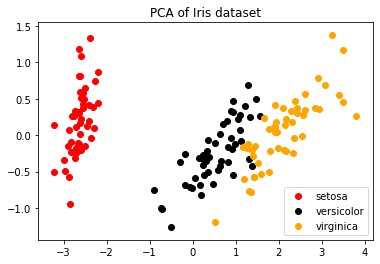

In [10]:
plt.figure()
plt.scatter(x_dr[y==0,0],x_dr[y==0,1],c='red',label=iris.target_names[0])
plt.scatter(x_dr[y==1,0],x_dr[y==1,1],c='black',label=iris.target_names[1])
plt.scatter(x_dr[y==2,0],x_dr[y==2,1],c='orange',label=iris.target_names[2])
plt.legend()
plt.title('PCA of Iris dataset')
plt.show()

In [12]:
#属性explained_variance_ 查看降维后每个新特征向量上所带的信息量大小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [14]:
#属性explained_variance_ratio_ 查看相位后每个新特征向量所占信息量占原始数据信息的比例
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

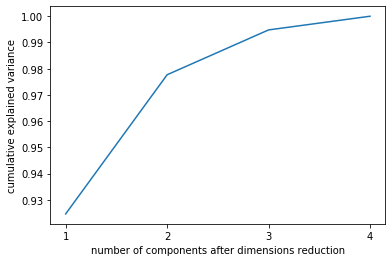

In [15]:
import numpy as np
pca_line = PCA().fit(x)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('number of components after dimensions reduction')
plt.ylabel('cumulative explained variance')
plt.show()

可见当n_components取2或3时即可保留原数据的绝大部分信息

In [20]:
#极大似然估计自选超参数
pca_mle = PCA(n_components='mle')
x_mle = pca_mle.fit_transform(x)
len(pca_mle.explained_variance_ratio_)

3

In [21]:
#信息量占比自选超参数
pca_f = PCA(n_components=0.99,svd_solver='full')
x_f = pca_f.fit_transform(x)
pca_f.explained_variance_ratio_.sum()

0.9947878161267246

In [22]:
x_f

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

##  PCA中的SVD

SVD可以跳过复杂的数学过程，不计算协方差矩阵，直接找出一个新特征向量组成的n维空间，而这个n维空间就是奇异值分解后的右矩阵V.T。右奇异矩阵V.T又有着如下性质 X' = X * V[:k]，即可以不计算协方差矩阵就直接求出降维后的特征矩阵，简单快捷

In [23]:
PCA(2).fit(x).components_
#V(k,n)

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

参数svc_solver:降维过程中，用来控制矩阵分解的细节的参数。

          'aotu':基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500*500，提出的特征数小于数据的最小维度min(X.shape)的80%，就启用效率更高的'randomized'方法。否则，精确的SVD将被计算，截断将会在矩阵被分解完成后有选择地发生
          
          'full':从scipy.linalg.svd中调用标准的LAPACK分解器来生成精确完整的SVD，适合数据量适中，计算时间充足的情况。
          
          'arpack':从scipy.sparse.linalg.svds调用ARPACK分解器来运行截断奇异值分解，分解时就将特征量降到n_components，可以加快运算速度，适合特征矩阵很大的时候，但一般用于特征矩阵为洗漱矩阵的情况。
          
          'randomized'：分解器先生成多个随机向量，然后一一检测这些随机向量中是否有一个符合我们的分解需求，若符合，则保留这个向量，并基于该向量来构建后续的向量空间。适用于特征矩阵巨大，计算量庞大的情况。

### 重要属性components_

In [24]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
faces.images.shape

In [ ]:
faces.data